# Preprocessing and data cleaning  


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x_train = pd.read_csv('data/dataset/x_train.csv')
y_train = pd.read_csv('data/dataset/y_train.csv')
x_test = pd.read_csv('data/dataset/x_test.csv')


## Drop column with only one value other than Nan 
Constant values do not give any informations about the features

In [18]:
clean_features = x_train

constant_columns = x_train.columns[x_train.nunique() == 1]
clean_features = clean_features.drop(columns=constant_columns)

print('Number of constant columns: ', len(constant_columns), '\nColumns: ', constant_columns)


Number of constant columns:  6 
Columns:  Index(['CTELENUM', 'COLGHOUS', 'STATERES', 'CTELNUM1', 'CELLFON2', 'CCLGHOUS'], dtype='object')


## Drop columns with a high percentage of Nan values 


In [19]:
Nan_values = clean_features.isna().sum()
Nan_percent = Nan_values / len(clean_features) * 100

threshold = 75

clean_features.drop(columns=Nan_percent[Nan_percent > threshold].index, inplace=True)
clean_features

,Id,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,0,53,11,11162015,11,16,2015,1100,2015015629,2015015629,...,1,1,3.0,3.0,4.0,1,1,NaN,NaN,2.0
1,1,33,12,12152015,12,15,2015,1200,2015004387,2015004387,...,9,9,3.0,3.0,4.0,9,9,NaN,NaN,NaN
2,2,20,10,10202015,10,20,2015,1100,2015005638,2015005638,...,4,2,2.0,2.0,3.0,1,1,1.0,2.0,2.0
3,3,42,6,6182015,6,18,2015,1100,2015004694,2015004694,...,2,2,2.0,2.0,3.0,1,1,2.0,2.0,2.0
4,4,24,11,11062015,11,6,2015,1100,2015004673,2015004673,...,9,9,3.0,3.0,4.0,1,1,9.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,328130,49,7,11232015,11,23,2015,1100,2015006796,2015006796,...,2,2,3.0,3.0,4.0,1,1,NaN,NaN,2.0
328131,328131,51,5,6082015,6,8,2015,1100,2015006482,2015006482,...,1,1,3.0,3.0,4.0,1,1,NaN,NaN,1.0
328132,328132,39,10,10202015,10,20,2015,1100,2015004898,2015004898,...,3,2,3.0,3.0,4.0,1,2,2.0,2.0,2.0
328133,328133,33,12,12302015,12,30,2015,1100,2015004449,2015004449,...,3,2,3.0,3.0,4.0,1,1,NaN,NaN,2.0


## Correlation matrix between the features 



In [29]:
correlation_matrix_features = clean_features.corr()
subset_features = correlation_matrix_features.iloc[:, 1:20]

corr_bis = subset_features.corr()

correlation_matrix_features

,Id,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
Id,1.000000,0.000907,0.003262,0.002478,0.002445,0.001247,0.001827,0.000320,0.002551,0.002551,...,0.001566,0.000743,-0.001056,0.000014,0.000159,-0.000359,-0.000444,0.000655,-0.000124,-0.000220
_STATE,0.000907,1.000000,-0.019665,-0.006838,-0.007151,0.013403,-0.049458,-0.041682,-0.038158,-0.038158,...,-0.017965,-0.028013,-0.019617,-0.017457,-0.018226,-0.037737,-0.037083,-0.033604,-0.027464,-0.023924
FMONTH,0.003262,-0.019665,1.000000,0.869030,0.869151,-0.041483,0.219106,0.006589,0.247005,0.247005,...,-0.006455,0.003145,-0.001372,-0.001581,-0.005199,0.005453,0.004940,0.013596,-0.000615,0.004788
IDATE,0.002478,-0.006838,0.869030,1.000000,0.999716,-0.029967,-0.245914,0.009891,0.207703,0.207703,...,-0.010990,0.002626,0.000070,0.001070,-0.002262,0.006166,0.005236,0.017356,0.003448,0.004966
IMONTH,0.002445,-0.007151,0.869151,0.999716,1.000000,-0.053800,-0.244964,0.007175,0.205301,0.205301,...,-0.012478,0.000908,-0.001409,-0.000124,-0.003727,0.003834,0.002897,0.015100,0.001378,0.005054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_RFSEAT2,-0.000359,-0.037737,0.005453,0.006166,0.003834,0.097467,0.038852,0.764156,0.046234,0.046234,...,0.712410,0.789234,0.463114,0.440615,0.446245,1.000000,0.994748,0.829033,0.739612,0.284372
_RFSEAT3,-0.000444,-0.037083,0.004940,0.005236,0.002897,0.097794,0.039102,0.760056,0.048701,0.048701,...,0.709637,0.785335,0.461740,0.438771,0.445058,0.994748,1.000000,0.825701,0.736876,0.266945
_FLSHOT6,0.000655,-0.033604,0.013596,0.017356,0.015100,0.093615,0.032544,0.726192,0.047316,0.047316,...,0.693044,0.748062,0.521124,0.476369,0.513090,0.829033,0.825701,1.000000,0.857330,0.080014
_PNEUMO2,-0.000124,-0.027464,-0.000615,0.003448,0.001378,0.086293,0.028674,0.658408,0.043090,0.043090,...,0.619063,0.668339,0.476427,0.430364,0.470569,0.739612,0.736876,0.857330,1.000000,0.078935


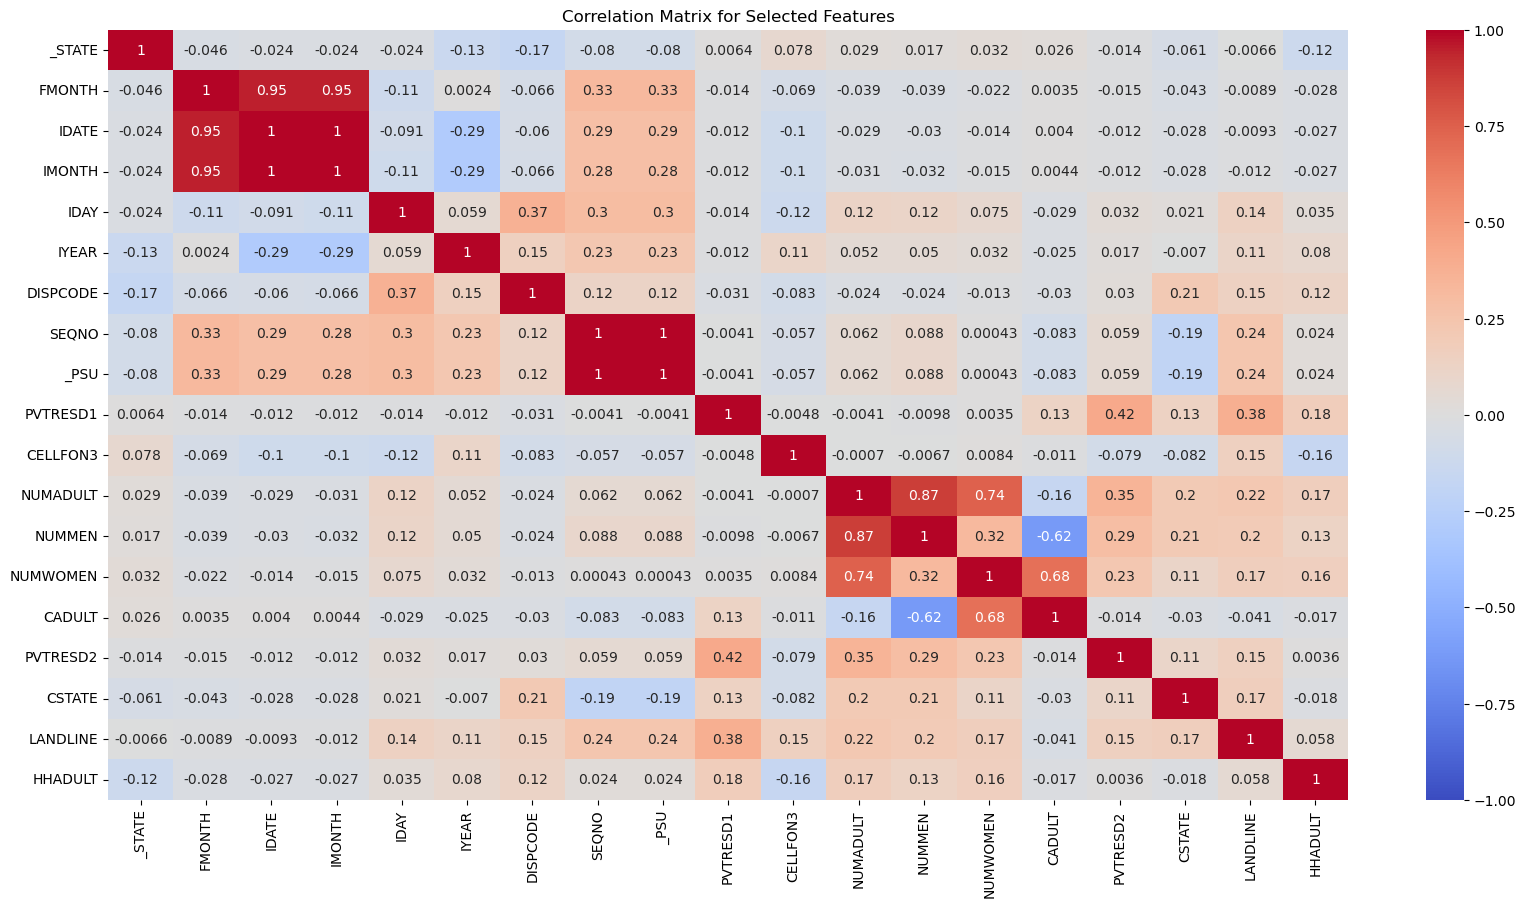

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_bis, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Features')
plt.show()

## Correlation between features and target 



In [27]:
clean_features

clean_features_with_y_train = pd.concat([clean_features, y_train['_MICHD']], axis=1,)
clean_features_with_y_train

correlation_matrix = clean_features_with_y_train.corr()


In [33]:
# in the correlation matrix, print the features that have more than 75% of correlation with the target

high_corr_w_target = correlation_matrix['_MICHD'][abs(correlation_matrix['_MICHD']) > 0.75]
correlation_matrix['_MICHD']


Id          0.002578
_STATE      0.005628
FMONTH      0.006665
IDATE       0.005441
IMONTH      0.006019
              ...   
_RFSEAT3   -0.003943
_FLSHOT6   -0.030532
_PNEUMO2   -0.040098
_AIDTST3    0.025758
_MICHD      1.000000
Name: _MICHD, Length: 202, dtype: float64

## Test with sklearn to identify features importance 

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [37]:

x_train_sklearn = clean_features
y_train_sklearn = y_train['_MICHD']

model = RandomForestRegressor()
model.fit(x_train_sklearn, y_train_sklearn)

RandomForestRegressor()

In [40]:
importances = model.feature_importances_
features = x_train_sklearn.columns


Index(['Id', '_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR',
       'DISPCODE', 'SEQNO', '_PSU',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=201)

In [42]:
feature_importances = {features[i]: importances[i] for i in range(len(features))}
df_importances = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance'])
df_importances = df_importances.sort_values('Importance', ascending=False)
df_importances.to_csv("csv_files/importance.csv")
